In [51]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('datasets/train.csv')
fuzz=pd.read_csv('datasets/Fuzz_table.csv')

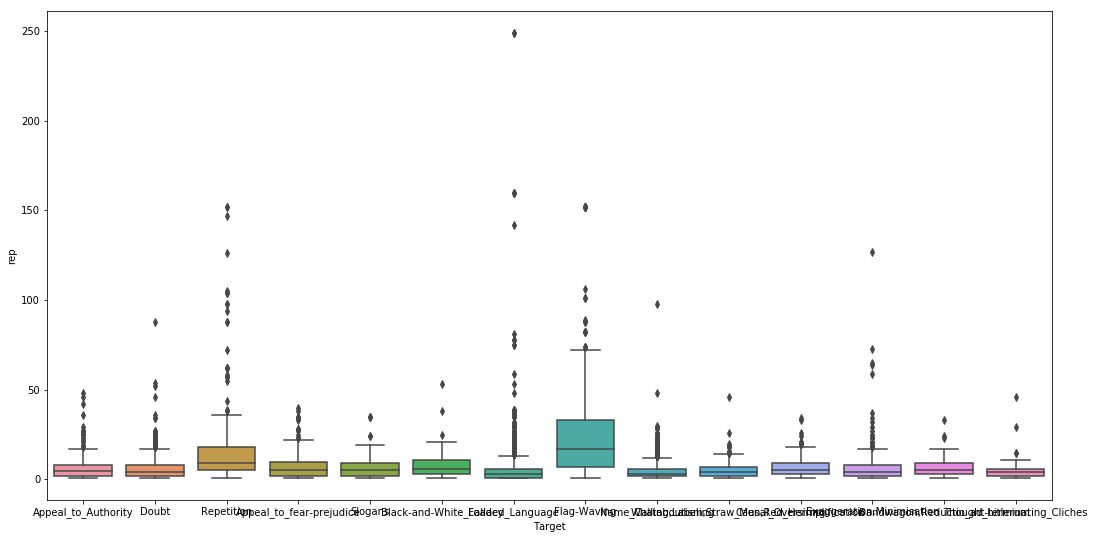

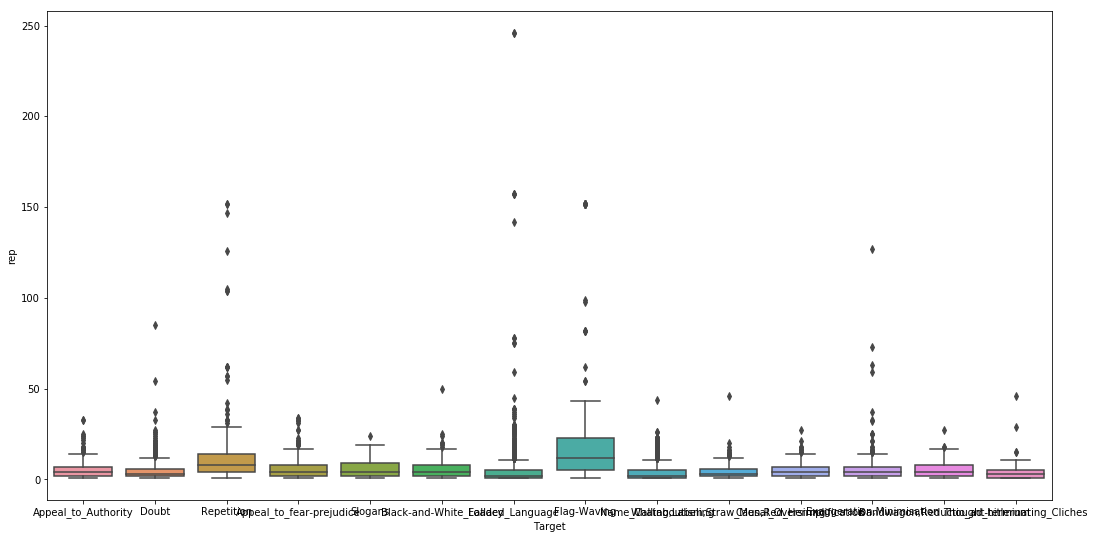

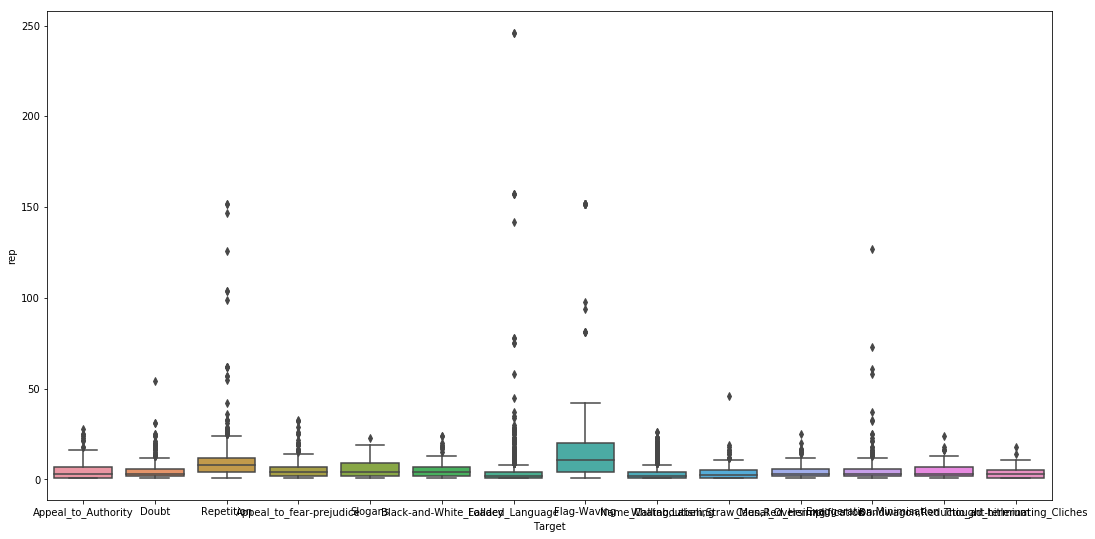

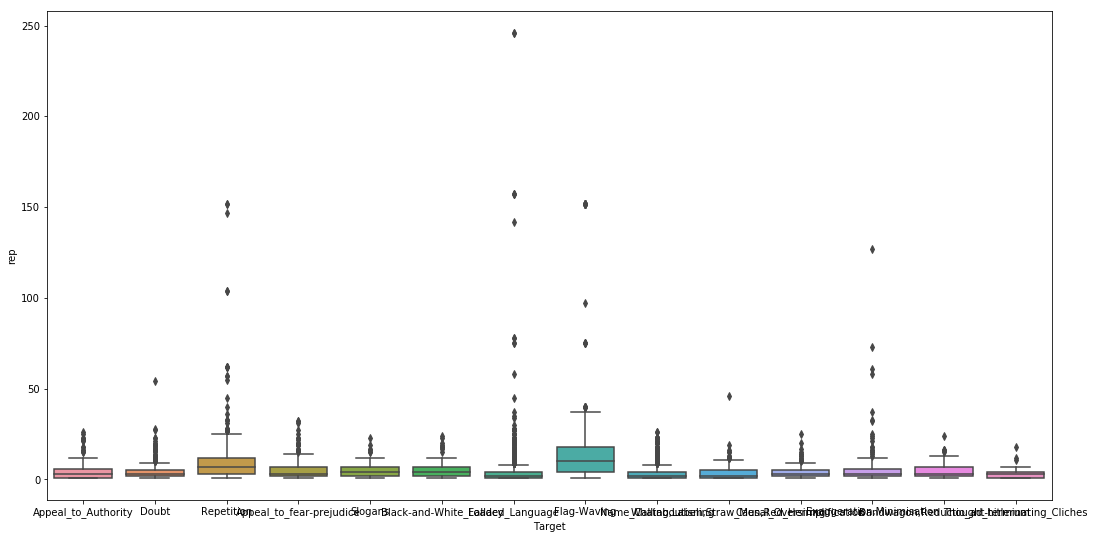

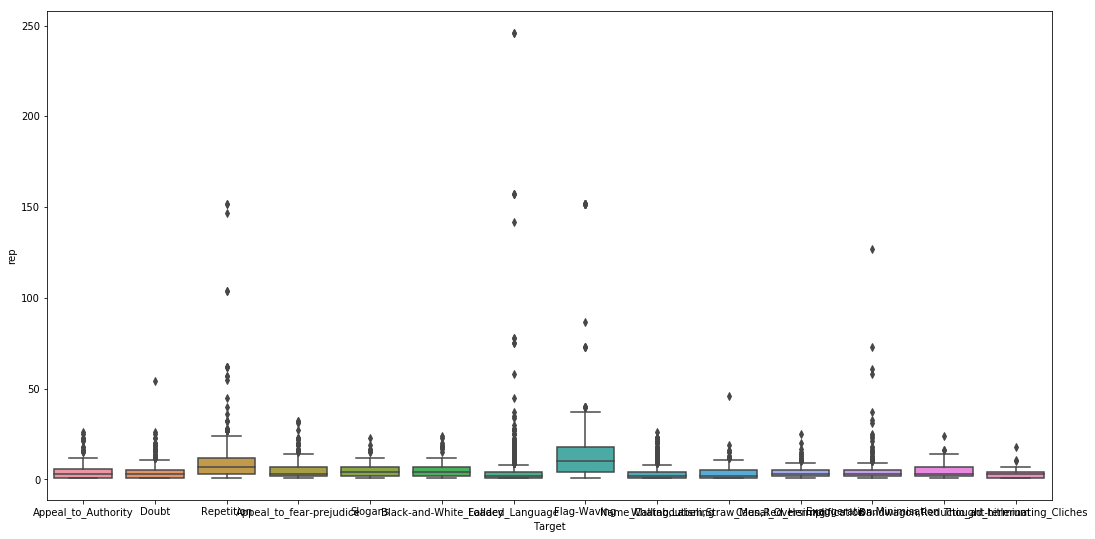

In [57]:
for thresh in range(75,100,5):
    train['rep']=(fuzz.values>thresh).sum(axis=1)
    train.groupby('Target')['rep'].describe()
    plt.figure(figsize=(18,9))
    sns.boxplot(x='Target',y='rep',data=train[train['rep']>0])

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Appeal_to_Authority,144.0,7.750000,8.914120,1.0,2.0,4.5,8.25,48.0
Appeal_to_fear-prejudice,294.0,7.051020,6.982727,1.0,2.0,5.0,10.00,40.0
"Bandwagon,Reductio_ad_hitlerum",72.0,7.027778,6.200800,1.0,3.0,5.0,9.00,33.0
Black-and-White_Fallacy,107.0,7.934579,7.692524,1.0,3.0,6.0,11.00,53.0
Causal_Oversimplification,209.0,6.822967,5.596380,1.0,3.0,5.0,9.00,34.0
Doubt,493.0,6.649087,7.574601,1.0,2.0,4.0,8.00,88.0
"Exaggeration,Minimisation",466.0,6.603004,9.372983,1.0,2.0,4.0,8.00,127.0
Flag-Waving,229.0,28.663755,35.142262,1.0,7.0,17.0,33.00,152.0
Loaded_Language,2123.0,5.559585,12.070075,1.0,1.0,3.0,6.00,249.0


In [38]:
a=np.array([[1,2,3],[4,6,2],[3,6,9]])
(a>3).sum(axis=1)

array([0, 2, 2])